In [1]:
import numpy as np
import os
import subprocess
from itertools import chain
import matplotlib.pyplot as plt

In [11]:
out_dir = "/media/nvme/pcdata"
in_dir = "/media/ssd/orig-data"

def run(in_dset, split_fun, unsplit_fun, num_col, num_row):
    in_path = os.path.join(in_dir, in_dset, "las")
    files = list(os.listdir(in_path))

    if (num_col > 0 or num_row > 0):
        xy = split_fun(files)
        xy = np.array(xy)

        xy = xy[np.lexsort((xy[:,1], xy[:,0]))]
        splits = np.array_split(xy, num_col)
        splits = [x[np.lexsort((x[:,0], x[:,1]))] for x in splits]
        splits = [np.array_split(x, num_row) for x in splits]
        splits = [item for sublist in splits for item in sublist]

        for i, split in enumerate(splits):
            files = [os.path.join(in_path, file) for file in unsplit_fun(split)]
            plt.scatter(split[:,0], split[:,1])
        plt.show()

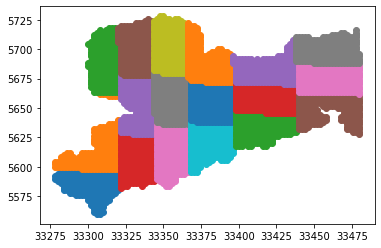

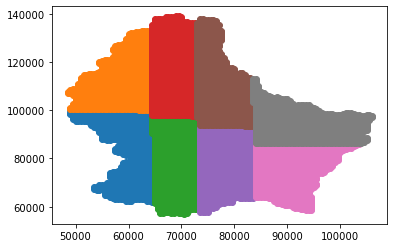

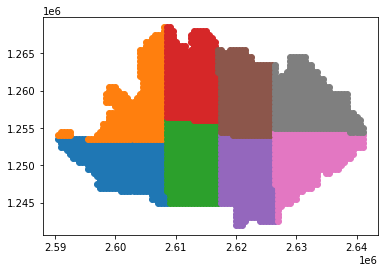

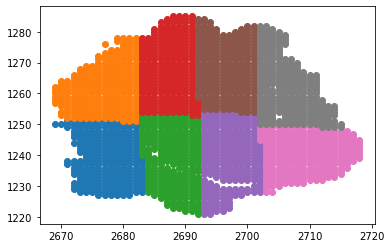

In [12]:
split_fun = lambda files: [[int(fname.split("_")[1]), int(fname.split("_")[2])] for fname in files]
unsplit_fun = lambda split:  ["las_%d_%d_2_sn.laz" % (x,y) for x,y in split]
run("sasche", split_fun, unsplit_fun, 6, 3)

split_fun = lambda files: [[int(x.split("_")[2]), int(x.split("_")[3])] for x in files]
unsplit_fun = lambda split:  ["LIDAR2019_NdP_%d_%d_EPSG2169.laz" % (x,y) for x,y in split]
run("lux", split_fun, unsplit_fun, 4, 2)

split_fun = lambda files: [[int(x.split("_")[0]), int(x.split("_")[1][:-4])] for x in files]
unsplit_fun = lambda split:  ["%d_%d.laz" % (x,y) for x,y in split]
run("basel", split_fun, unsplit_fun, 4, 2)

split_fun = lambda files: [[int(x.split("_")[0]), int(x.split("_")[1][:-4])] for x in files]
unsplit_fun = lambda split:  ["%d_%d.laz" % (x,y) for x,y in split]
run("zurich", split_fun, unsplit_fun, 4, 2)